**TP-4: Deep Learning**

**ALAOUI Brahim** 

**Master : BIBDA**

Appliquer le modèle précédemment vu sur la dataset de diabètes pour prédire la maladie de diabète 

In [1]:
from keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Separation des caracteristiques (X) et de la cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
# Division des donnees en ensembles d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Creation du modele de reseau de neurones
model = Sequential()

In [13]:
# Ajout des couches
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Couche d'entrée avec 16 neurones
model.add(Dense(8, activation='relu'))  # Couche cachée avec 8 neurones
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie avec activation sigmoïde pour une classification binaire


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compilation du modele
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Entrainement du modele
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4746 - loss: 0.7064 - val_accuracy: 0.5203 - val_loss: 0.7008
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7044 - loss: 0.6576 - val_accuracy: 0.6423 - val_loss: 0.6742
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7047 - loss: 0.6401 - val_accuracy: 0.6748 - val_loss: 0.6511
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7602 - loss: 0.6128 - val_accuracy: 0.7073 - val_loss: 0.6247
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7677 - loss: 0.5826 - val_accuracy: 0.7073 - val_loss: 0.5984
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7760 - loss: 0.5438 - val_accuracy: 0.7154 - val_loss: 0.5646
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7887 - loss: 0.4942 - val_accuracy: 0.7236 - val_loss: 0.5424
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7731 - loss: 0.4841 - val_accuracy: 0.7236 - val_loss:

In [19]:
# evaluation du modele sur les donnees de test
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5750
Test Loss: 0.5929628610610962, Test Accuracy: 0.7402597665786743


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


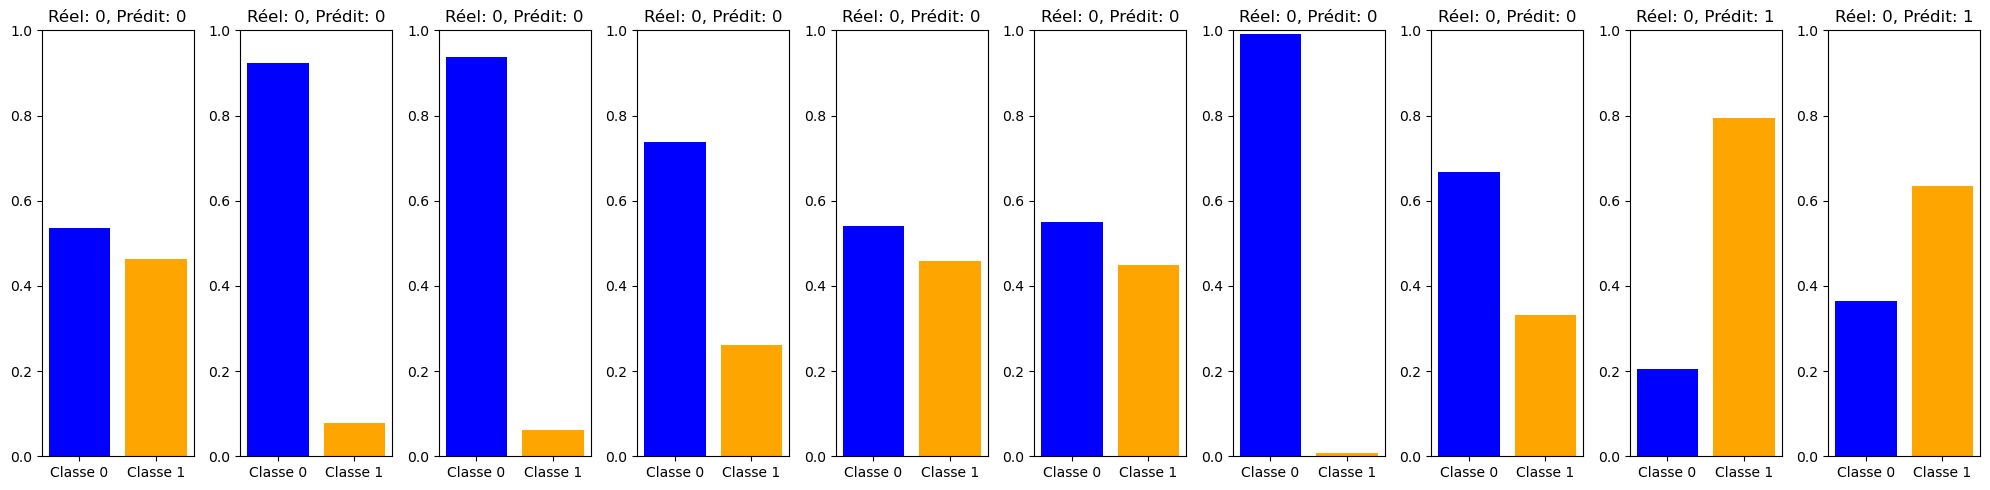

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Faire des prédictions sur les données de test
pred_y = model.predict(X_test_scaled)

# Convertir les probabilités en classes binaires (0 ou 1)
pred_y_classes = (pred_y > 0.5).astype("int32")

# Nombre d'exemples que nous voulons visualiser
num_samples = 10  # On visualise les 10 premières prédictions

# Initialisation de la figure avec des sous-graphes
fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

# Visualisation des résultats
for i in range(num_samples):
    ax = axes[i]
    
    # Sélectionner la probabilité associée à la classe 1 pour l'échantillon i
    predicted_prob = pred_y[i][0]  # Extraire la valeur de probabilité pour l'échantillon i
    
    # Barres pour la classe 0 (1 - probabilité) et la classe 1 (probabilité)
    ax.bar([0, 1], [1 - predicted_prob, predicted_prob], color=['blue', 'orange'])
    
    # Définir le titre pour indiquer la classe réelle et la classe prédite
    ax.set_title(f"Réel: {y_test.iloc[i]}, Prédit: {pred_y_classes[i][0]}")
    
    # Définir les labels pour les classes 0 et 1
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Classe 0', 'Classe 1'])
    
    # Limiter l'échelle des probabilités à [0, 1]
    ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()
